In [29]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut
from scipy.stats import pearsonr, spearmanr

from matplotlib import font_manager
from visual_config import *

for font in font_manager.findSystemFonts("figures/Atkinson_Typeface/"):
    font_manager.fontManager.addfont(font)
    
set_visual_style()

In [4]:
consensus_mat = scipy.io.loadmat(
    "Consensus_Connectomes.mat",
    simplify_cells=True,
    squeeze_me=True,
    chars_as_strings=True,
)
connectivity = ut.spectral_normalization(
    1, consensus_mat["LauConsensus"]["Matrices"][2][0]
)
labels = consensus_mat["LauConsensus"]["Matrices"][2][4][:, 0]

In [10]:
N_TRIALS = 10
all_trials = np.zeros((len(connectivity), len(connectivity), N_TRIALS))

for trial in range(N_TRIALS):
        temp = (
            pd.read_pickle(
                f"results/nonlinear_weighted/causal_modes_nl_w_{len(connectivity)}_{trial}.pickle"
            )
            .groupby(level=0)
            .var()
            .fillna(0)
        )
        all_trials[:, :, trial] = temp
averaged_nl_ci = all_trials.mean(axis=2)
lognorm_nl_ci = ut.log_minmax_normalize(averaged_nl_ci)

/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [11]:
for trial in range(N_TRIALS):
        temp = (
            pd.read_pickle(
                f"results/linear_weighted/causal_modes_l_w_{len(connectivity)}_{trial}.pickle"
            )
            .groupby(level=0)
            .var()
            .fillna(0)
        )
        all_trials[:, :, trial] = temp
averaged_l_ci = all_trials.mean(axis=2)
lognorm_l_ci = ut.log_minmax_normalize(averaged_l_ci)

/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [88]:
macaque_sc = np.loadtxt("macaqueSC")
macaque_sc_lognorm = ut.log_minmax_normalize(macaque_sc)
all_trials = np.zeros((len(macaque_sc), len(macaque_sc), N_TRIALS))

for trial in range(N_TRIALS):
        temp = (
            pd.read_pickle(
                f"results/linear_weighted/macaqueSC_causal_modes_l_w_{len(macaque_sc)}_{trial}.pickle"
            )
            .groupby(level=0)
            .var()
            .fillna(0)
        )
        all_trials[:, :, trial] = temp
macaque_averaged_l_ci = all_trials.mean(axis=2)
macaque_lognorm_l_ci = ut.log_minmax_normalize(macaque_averaged_l_ci)
macaque_direct_influence = pd.DataFrame(macaque_lognorm_l_ci).where(macaque_sc != 0)

/home/kayson/ownCloud/communication-and-causation/utils.py:277: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)
/home/kayson/ownCloud/communication-and-causation/utils.py:277: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)


In [125]:
mouse_sc = np.loadtxt("mouseSC")
mouse_sc_lognorm = ut.log_minmax_normalize(ut.minmax_normalize(mouse_sc))

all_trials = np.zeros((len(mouse_sc), len(mouse_sc), N_TRIALS))
for trial in range(N_TRIALS):
        temp = (
            pd.read_pickle(
                f"results/linear_weighted/mouseSC_causal_modes_l_w_{len(mouse_sc)}_{trial}.pickle"
            )
            .groupby(level=0)
            .var()
            .fillna(0)
        )
        all_trials[:, :, trial] = temp
mouse_averaged_l_ci = all_trials.mean(axis=2)
mouse_lognorm_l_ci = ut.log_minmax_normalize(mouse_averaged_l_ci)
mouse_direct_influence = pd.DataFrame(mouse_lognorm_l_ci).where(mouse_sc != 0)

/home/kayson/ownCloud/communication-and-causation/utils.py:277: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)
/home/kayson/ownCloud/communication-and-causation/utils.py:277: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num(np.log(adjacency_matrix), neginf=0, posinf=0)


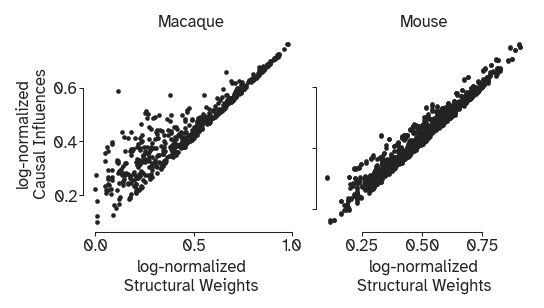

In [145]:
fig, axes = plt.subplot_mosaic([["A", "B"]], figsize=SMALL, dpi=150)

sns.scatterplot(
    x=macaque_sc_lognorm.flatten()[macaque_sc.flatten() != 0],
    y=macaque_direct_influence.values.flatten()[macaque_sc.flatten() != 0],
    s=5,
    linewidth=0,
    ax=axes["A"],
    rasterized=True,
    color=HALF_BLACK
)

sns.scatterplot(
    x=mouse_sc_lognorm.flatten()[mouse_sc_lognorm.flatten() != 0.],
    y=mouse_direct_influence.values.flatten()[mouse_sc_lognorm.flatten() != 0.],
    s=5,
    linewidth=0,
    ax=axes["B"],
    rasterized=True,
    color=HALF_BLACK,
)
axes["A"].set_ylabel("log-normalized\nCausal Influences", fontsize=8)
axes["A"].set_xlabel("log-normalized\nStructural Weights", fontsize=8)

axes["B"].set_yticklabels([])
axes["B"].set_xlabel("log-normalized\nStructural Weights", fontsize=8)

axes["A"].set_title("Macaque", fontsize=8)
axes["B"].set_title("Mouse", fontsize=8)
sns.despine(fig=fig, offset=1, trim=True)
fig.tight_layout(pad=0.5)
plt.savefig(f"figures/sc_ci_mouse_macaque.pdf",dpi=600,bbox_inches='tight')


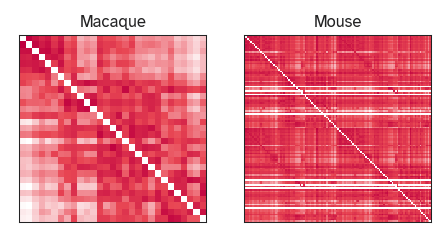

In [143]:
fig, axes = plt.subplot_mosaic([["A", "B"]], figsize=SMALL, dpi=150)

sns.heatmap(macaque_lognorm_l_ci,cmap=white_red_mono,square=True,xticklabels=False,yticklabels=False,cbar=False,ax=axes["A"])
sns.heatmap(mouse_lognorm_l_ci,cmap=white_red_mono,square=True,xticklabels=False,yticklabels=False,cbar=False,ax=axes["B"])
axes["A"].set_title("Macaque", fontsize=8)
axes["B"].set_title("Mouse", fontsize=8)

sns.despine(fig=fig,top=False, right=False, left=False, bottom=False)

In [ ]:
hopf = pd.read_pickle(f"results/causal_modes_hopf_219_T5.pickle")
hopf_modes = hopf.values.reshape(219, 5000, 219)

In [31]:
no_transition_hopf_modes = hopf_modes[:, 1000:, :].copy()
averaged_hopf_ci = pd.DataFrame(np.nan_to_num(no_transition_hopf_modes).var(axis=1))
lognorm_hopf_ci = ut.log_minmax_normalize(averaged_hopf_ci)

short_hopf_modes = hopf_modes[:, 4500:-1, :].copy()
averaged_short_hopf_ci = pd.DataFrame(np.nan_to_num(short_hopf_modes).var(axis=1))

lognorm_short_hopf_ci = ut.log_minmax_normalize(averaged_short_hopf_ci)

transition_hopf_modes = hopf_modes[:, :1000, :].copy()
averaged_transition_hopf_ci = pd.DataFrame(np.nan_to_num(transition_hopf_modes).var(axis=1))
lognorm_transition_hopf_ci = ut.log_minmax_normalize(averaged_transition_hopf_ci)


/home/kayson/anaconda3/envs/communicability/lib/python3.9/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


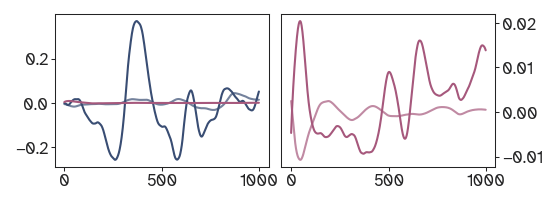

In [30]:
fig, axes = plt.subplot_mosaic([["A", "B"]], figsize=(9 * CM, 3 * CM), dpi=150)
# influence of [this, :, over this]

# 0: lateralorbitofrontal
# 2: lateralorbitofrontal
# 6: medialorbitofrontal
# 20: superiorfrontal

# 9: pars triangularis
# 44: postcentral
axes["A"].plot(hopf_modes[0, :1000, 2], color=NIGHT_BLUE)
axes["A"].plot(hopf_modes[0, :1000, 6], color=NIGHT_BLUE, alpha=0.7)
axes["A"].plot(hopf_modes[0, :1000, 20], color=PURPLE)

axes["B"].plot(hopf_modes[0, :1000, 9], color=PURPLE)
axes["B"].plot(hopf_modes[0, :1000, 44], color=PURPLE, alpha=0.7)
axes["B"].tick_params(
    axis="y", labelright=True, labelleft=False, right=True, left=False
)

fig.tight_layout(pad=0.1)

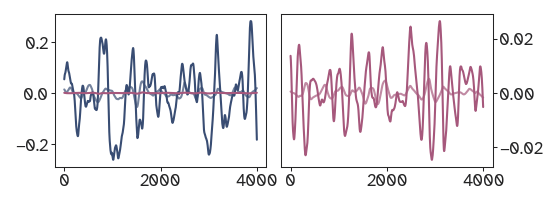

In [24]:
fig, axes = plt.subplot_mosaic([["A", "B"]], figsize=(9 * CM, 3 * CM), dpi=150)

axes["A"].plot(no_transition_hopf_modes[0, :, 2], color=NIGHT_BLUE)
axes["A"].plot(no_transition_hopf_modes[0, :, 6], color=NIGHT_BLUE, alpha=0.7)
axes["A"].plot(no_transition_hopf_modes[0, :, 20], color=PURPLE)

axes["B"].plot(no_transition_hopf_modes[0, :, 9], color=PURPLE)
axes["B"].plot(no_transition_hopf_modes[0, :, 44], color=PURPLE, alpha=0.7)
axes["B"].tick_params(
    axis="y", labelright=True, labelleft=False, right=True, left=False
)

fig.tight_layout(pad=0.1)
#plt.savefig(f"figures/HOPF_example_modes.pdf", dpi=600, bbox_inches="tight")

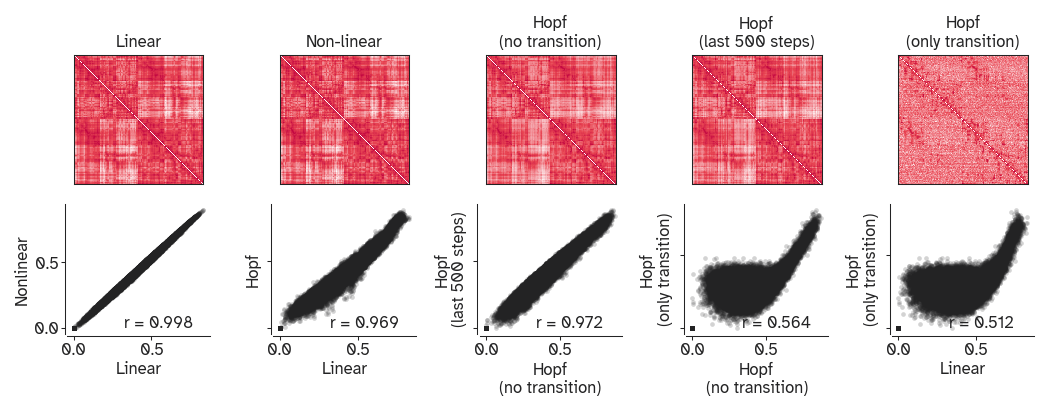

In [81]:
fig, axes = plt.subplot_mosaic(
    [["A", "B", "C", "D","E"], ["F", "G", "H", "I","J"]], figsize=HALF_PAGE, dpi=150
)

sns.heatmap(
    lognorm_l_ci,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=white_red_mono,
    cbar=False,
    linewidths=0,
    linecolor=HALF_BLACK,
    rasterized=True,
    ax=axes["A"],
)
axes['A'].set_title("Linear")


sns.heatmap(
    lognorm_nl_ci,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=white_red_mono,
    cbar=False,
    linewidths=0,
    linecolor=HALF_BLACK,
    rasterized=True,
    ax=axes["B"],
)
axes['B'].set_title("Non-linear")


sns.heatmap(
    lognorm_hopf_ci,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=white_red_mono,
    cbar=False,
    linewidths=0,
    linecolor=HALF_BLACK,
    rasterized=True,
    ax=axes["C"],
)
axes['C'].set_title("Hopf\n(no transition)")

sns.heatmap(
    lognorm_short_hopf_ci,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=white_red_mono,
    cbar=False,
    linewidths=0,
    linecolor=HALF_BLACK,
    rasterized=True,
    ax=axes["D"],
)
axes['D'].set_title("Hopf\n(last 500 steps)")

sns.heatmap(
    lognorm_transition_hopf_ci,
    square=True,
    xticklabels=False,
    yticklabels=False,
    cmap=white_red_mono,
    cbar=False,
    linewidths=0,
    linecolor=HALF_BLACK,
    rasterized=True,
    ax=axes["E"],
)
axes['E'].set_title("Hopf\n(only transition)")


sns.scatterplot(
    y=lognorm_nl_ci.flatten(),
    x=lognorm_l_ci.flatten(),
    s=5,
    linewidth=0,
    alpha=0.2,
    color=HALF_BLACK,
    rasterized=True,
    ax=axes["F"],
)

r = pearsonr(
    lognorm_nl_ci.flatten(), lognorm_l_ci.flatten()
)[0]

axes["F"].annotate(
    f"r = {round(r,3)}",
    color=HALF_BLACK,
    xy=(0.4, 0.05),
    xycoords="axes fraction",
)
axes["F"].set_xlabel("Linear")
axes["F"].set_ylabel("Nonlinear")


sns.scatterplot(
    y=lognorm_hopf_ci.flatten(),
    x=lognorm_l_ci.flatten(),
    s=5,
    linewidth=0,
    alpha=0.2,
    color=HALF_BLACK,
    rasterized=True,
    ax=axes["G"],
)

r = pearsonr(
    lognorm_hopf_ci.flatten(), lognorm_l_ci.flatten()
)[0]

axes["G"].annotate(
    f"r = {round(r,3)}",
    color=HALF_BLACK,
    xy=(0.4, 0.05),
    xycoords="axes fraction",
)
axes["G"].set_xlabel("Linear")
axes["G"].set_ylabel("Hopf")


sns.scatterplot(
    y=lognorm_short_hopf_ci.flatten(),
    x=lognorm_hopf_ci.flatten(),
    s=5,
    linewidth=0,
    alpha=0.2,
    color=HALF_BLACK,
    rasterized=True,
    ax=axes["H"],
)

r = pearsonr(
    lognorm_hopf_ci.flatten(), lognorm_short_hopf_ci.flatten()
)[0]

axes["H"].annotate(
    f"r = {round(r,3)}",
    color=HALF_BLACK,
    xy=(0.4, 0.05),
    xycoords="axes fraction",
)
axes["H"].set_xlabel("Hopf\n(no transition)")
axes["H"].set_ylabel("Hopf\n(last 500 steps)")


sns.scatterplot(
    y=lognorm_transition_hopf_ci.flatten(),
    x=lognorm_hopf_ci.flatten(),
    s=5,
    linewidth=0,
    alpha=0.2,
    color=HALF_BLACK,
    rasterized=True,
    ax=axes["I"],
)

r = pearsonr(
    lognorm_hopf_ci.flatten(), lognorm_transition_hopf_ci.flatten()
)[0]

axes["I"].annotate(
    f"r = {round(r,3)}",
    color=HALF_BLACK,
    xy=(0.4, 0.05),
    xycoords="axes fraction",
)
axes["I"].set_xlabel("Hopf\n(no transition)")
axes["I"].set_ylabel("Hopf\n(only transition)")

sns.scatterplot(
    y=lognorm_transition_hopf_ci.flatten(),
    x=lognorm_l_ci.flatten(),
    s=5,
    linewidth=0,
    alpha=0.2,
    color=HALF_BLACK,
    rasterized=True,
    ax=axes["J"],
)

r = pearsonr(
    lognorm_l_ci.flatten(), lognorm_transition_hopf_ci.flatten()
)[0]

axes["J"].annotate(
    f"r = {round(r,3)}",
    color=HALF_BLACK,
    xy=(0.4, 0.05),
    xycoords="axes fraction",
)
axes["J"].set_xlabel("Linear")
axes["J"].set_ylabel("Hopf\n(only transition)")

for axis in ["A","B","C","D","E",]:
    sns.despine(ax=axes[axis], top=False, right=False, left=False, bottom=False)


for axis in ["G","H","I","J",]:
    axes[axis].set_yticklabels([])

for axis in ["F","G","H","I","J",]:
    sns.despine(ax=axes[axis], offset=1, trim=False)
fig.tight_layout(pad=1)
plt.savefig(f"figures/model_comparison.pdf",dpi=600,bbox_inches='tight')